**Si Nguyen Pham**

**Senior at VNU HCM International University**

**August, 7th, 2021**

**AN OVERVIEW OF GLOBAL COVID-19 VACCINATIONS PROGRESS**

**Introduction:**

At the moment, I guess almost everyone in this world has heard at least once about COVID-19. It has been nearly two years since the world recorded the first case of COVID-19. Fortunately, we have produced several types of vaccines against the pandemic. If you regurlarly update daily news, you must see and hear about COVID-19 statistics. In case you are wondering how people work with it, then this notebook is suitable for you. In this notebook, I mainly focus on analyzing information that related to the vaccinations progress. We will go through step by step to reach the final result. This notebook is also suitable for those who are at beginner level or intermediate. Follow this notebook thoroughly, you will get all of the information I provided since I explained everything in detail.

This project uses Python languague.

Many thanks to Gabriel Preda and Rishav Sharma for providing the two dataframes.

**I. Setting environment:**

**1.1. Import librabries:**

In [1]:
# Import librabries:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

**1.2. Reading files:**

In [2]:
# Read the country_vaccinations dataset
df = pd.read_csv("country_vaccinations.csv")


In [3]:
# Read the country_vaccinations_by_manufacturer dataset
vbm = pd.read_csv("country_vaccinations_by_manufacturer.csv")
# Read the 2021_population dataset
wp = pd.read_csv("2021_population.csv")

**II. Data Checking and Cleaning:**

**2.1. Country_vaccinations dataset:**

In [4]:
# Call out the first 5 rows of the dataset
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [5]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35943 entries, 0 to 35942
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              35943 non-null  object 
 1   iso_code                             35943 non-null  object 
 2   date                                 35943 non-null  object 
 3   total_vaccinations                   20041 non-null  float64
 4   people_vaccinated                    19152 non-null  float64
 5   people_fully_vaccinated              16290 non-null  float64
 6   daily_vaccinations_raw               16538 non-null  float64
 7   daily_vaccinations                   35684 non-null  float64
 8   total_vaccinations_per_hundred       20041 non-null  float64
 9   people_vaccinated_per_hundred        19152 non-null  float64
 10  people_fully_vaccinated_per_hundred  16290 non-null  float64
 11  daily_vaccinations_per_milli

Since it looks like that the null values do not affect our calculation seen the values at the total_vaccionations columns are cummulative. Therefore, we did not need to clean our data.

In [6]:
# Count the number of countries in the dataset
df['country'].nunique()

219

There are 219 countries listed in the country_vaccinations dataset

**2.2. Counttry_vaccinations_by_manufacturers:**

In [7]:
# Call out the first 5 rows of the dataset
vbm.head()

,location,date,vaccine,total_vaccinations
0,Austria,2021-01-08,Johnson&Johnson,0
1,Austria,2021-01-08,Moderna,0
2,Austria,2021-01-08,Oxford/AstraZeneca,0
3,Austria,2021-01-08,Pfizer/BioNTech,31020
4,Austria,2021-01-15,Johnson&Johnson,0


In [8]:
# Dataset information
vbm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10965 entries, 0 to 10964
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   location            10965 non-null  object
 1   date                10965 non-null  object
 2   vaccine             10965 non-null  object
 3   total_vaccinations  10965 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 342.8+ KB


This dataset looks perfect!

In [9]:
vbm['location'].nunique()

34

Meanwhile, in the country_vaccinations_by_manufacturers, there are only 33 countries listed

**2.3. World_population dataset:**

In [10]:
# Call out the first 5 rows of the dataset
wp.head()

,iso_code,country,2021_last_updated,2020_population,area,density_sq_km,growth_rate,world_%,rank
0,CHN,China,"1,444,712,023","1,439,323,776","9,706,961 sq_km",149/sq_km,0.34%,18.34%,1
1,IND,India,"1,394,784,323","1,380,004,385","3,287,590 sq_km",424/sq_km,0.97%,17.69%,2
2,USA,United States,"333,114,077","331,002,651","9,372,610 sq_km",36/sq_km,0.58%,4.23%,3
3,IDN,Indonesia,"276,653,405","273,523,615","1,904,569 sq_km",145/sq_km,1.04%,3.51%,4
4,PAK,Pakistan,"225,639,396","220,892,340","881,912 sq_km",255/sq_km,1.95%,2.86%,5


In [11]:
# Dataset infomartion
wp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   iso_code           228 non-null    object
 1   country            228 non-null    object
 2   2021_last_updated  228 non-null    object
 3   2020_population    228 non-null    object
 4   area               228 non-null    object
 5   density_sq_km      228 non-null    object
 6   growth_rate        228 non-null    object
 7   world_%            228 non-null    object
 8   rank               228 non-null    int64 
dtypes: int64(1), object(8)
memory usage: 16.2+ KB


This dataset is perfect, too!

In [12]:
wp['country'].nunique()

228

There are 228 countries listed in this dataset.

**2.4. Concatenate two dataframes:**

To estimate the rate of fully vaccinated people of one country per its population, I needed to concat two dataframes. As we can see, in the world population dataset, there are 228 countries listed while in country vaccinations dataset there are only 219 countries. That means we need to clean and remove countries that are mentioned once.

As a beginner, I do not have many advanced techniques. Howerver, I am proud to get the below dataset. The idea here is to choose the neccesary columns, concat the chosen dataframes, filter out values that appear more than once in the new dataframes (remove values that appear only in 1 of the 2 dataframes which means that they are redundant data), drop duplicated values (keep last and first in order to keep the neccesary data) and reset their index. Actually, you can also clean the data using Excel but I wanted to challenge myself by using Python, so if you want to do the same thing, you can reference the idea.

In [13]:
wp_sort = wp[['country', '2021_last_updated']] 
wp_sort.sort_values('country') 
vcn_drop = df.drop_duplicates('country', keep = "last") 
vcn_sort = vcn_drop[['country', 'people_fully_vaccinated']]
df_same = pd.concat([wp_sort,vcn_sort]) 
df_same = df_same[df_same.groupby('country').country.transform(len) > 1] 
df_same = df_same.drop_duplicates('country', keep = "last") 
df_same_sort = df_same[['country', 'people_fully_vaccinated']] 
df_same_sort = df_same_sort.rename(columns={'country' : 'country_vaccinations'}) 
df_same_sort.reset_index(drop=True, inplace=True) 
wp_clean = pd.concat([wp, df_same])
wp_clean = wp_clean[wp_clean.groupby('country').country.transform(len) > 1]
wp_clean = wp_clean.drop_duplicates('country', keep = "first")
wp_clean_sort = wp_clean[['country', '2021_last_updated']]
wp_clean_sort = wp_clean_sort.sort_values('country')
wp_clean_sort.reset_index(drop = True, inplace=True)
cbn = pd.concat([wp_clean_sort, df_same_sort], axis=1)
cbn


,country,2021_last_updated,country_vaccinations,people_fully_vaccinated
0,Afghanistan,"39,929,284",Afghanistan,NaN
1,Albania,"2,872,370",Albania,545036.0
2,Algeria,"44,694,125",Algeria,724812.0
3,Andorra,"77,355",Andorra,33904.0
4,Angola,"34,043,709",Angola,710113.0
...,...,...,...,...
183,Venezuela,"28,728,962",Venezuela,1100000.0
184,Vietnam,"98,253,611",Vietnam,888459.0
185,Yemen,"30,558,838",Yemen,13322.0
186,Zambia,"18,975,907",Zambia,188219.0


Great, so bascially, we already had our wanted dataframe which is the combination of the country_vaccinations dataframe and the world_population dataframe with no unwanted country. Let's check once again to see whether the new dataframe is really clean or not.

In [14]:
cbn.isna().sum()

country                     0
2021_last_updated           0
country_vaccinations        0
people_fully_vaccinated    13
dtype: int64

As we can see, there are 14 null values in the people_fully_vaccinated column. Therefore, I needed to drop all of it.

In [15]:
cbn = cbn.dropna()
cbn = cbn.reset_index()
cbn

,index,country,2021_last_updated,country_vaccinations,people_fully_vaccinated
0,1,Albania,"2,872,370",Albania,545036.0
1,2,Algeria,"44,694,125",Algeria,724812.0
2,3,Andorra,"77,355",Andorra,33904.0
3,4,Angola,"34,043,709",Angola,710113.0
4,5,Anguilla,"15,117",Anguilla,8765.0
...,...,...,...,...,...
170,183,Venezuela,"28,728,962",Venezuela,1100000.0
171,184,Vietnam,"98,253,611",Vietnam,888459.0
172,185,Yemen,"30,558,838",Yemen,13322.0
173,186,Zambia,"18,975,907",Zambia,188219.0


One other important step when cleaning data is to check whether that targeted data is in the right type or not. In further calculation, I worked with values from 2021_last_updated and people_fully_vaccinated. Therefore, I had to make sure that they were in the same type.

In [16]:
# Check data types
cbn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    175 non-null    int64  
 1   country                  175 non-null    object 
 2   2021_last_updated        175 non-null    object 
 3   country_vaccinations     175 non-null    object 
 4   people_fully_vaccinated  175 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 7.0+ KB


Since the data in 2021_last_updated column was not in the type I want, so I reformatted it.

In [17]:
# Reformat data type
cbn.replace(',','', regex=True, inplace=True)
cbn['2021_last_updated'] = cbn['2021_last_updated'].map(lambda x: float(x))
cbn['people_fully_vaccinated'] = cbn['people_fully_vaccinated'].map(lambda x: float(x))
cbn

,index,country,2021_last_updated,country_vaccinations,people_fully_vaccinated
0,1,Albania,2872370.0,Albania,545036.0
1,2,Algeria,44694125.0,Algeria,724812.0
2,3,Andorra,77355.0,Andorra,33904.0
3,4,Angola,34043709.0,Angola,710113.0
4,5,Anguilla,15117.0,Anguilla,8765.0
...,...,...,...,...,...
170,183,Venezuela,28728962.0,Venezuela,1100000.0
171,184,Vietnam,98253611.0,Vietnam,888459.0
172,185,Yemen,30558838.0,Yemen,13322.0
173,186,Zambia,18975907.0,Zambia,188219.0


So far so good. Then, I had to clean data once again to make sure that there was no weird value or logic. In this case, I would check whether there was any country with the number of fully vaccinated people was higher than the last updated population number.

In [18]:
# Check weird data
cbn[cbn['2021_last_updated'] < cbn['people_fully_vaccinated']]

,index,country,2021_last_updated,country_vaccinations,people_fully_vaccinated
61,65,Gibraltar,33698.0,Gibraltar,39119.0


Because I was using two independent datasets. Therefore, the updated data might not match for some country, Gibraltar for example. All I had to do was to remove this country.

In [19]:
# Remove weird data 
cbn = cbn.drop(index = [61])


Well, so I have pretty much done with our dataframes!

Let's get started out EDA!

**III. Exploratory Data Analysis:**

Firstly, let's analyze the global country vaccinations data progress. Here, we have the following questions to answer:
1. What are the top 5 biggest and smallest countries with vaccinations progress ?
2. Which countries are outstanding vaccinations progress ?
3. What is the global average vaccinations by month ?
4. What vaccine is most common and least used ?
5. What are the top 5 countries that are having the highest and lowest of fully vaccinated people per population ?


**3.1.1. What are the top 5 biggest countries with vaccinations progress ?**

Here, I tried to find 5 countries with highest number of vaccinations. Since I saw that in total_vaccinations columns, the values are cummulative. Therefore, instead of using sum function, I used max function to take the lastest value. You can alsop use sum function but in this case, the column you work with is the daily_vaccinations.

In [20]:
#Five Highest Countries
total = df.groupby('country')['total_vaccinations'].max().reset_index()
fhc = total.sort_values('total_vaccinations', ascending=False).head(5)
pd.set_option('display.float_format', lambda x: '%.0f'% x)
fhc

,country,total_vaccinations
40,China,1782525000
90,India,508664759
208,United States,351400930
27,Brazil,152989038
99,Japan,99651092


Here, you can see that China, known as the first country that the COVID-19 pandemic occurred has the highest number of total vaccinations. Nearly 1.76 billions vaccine doses were used. It is reasonable because China has faced the pandemic for 2 years and they population is the highest in the world. The next 3 positions are for India, United States and Brazil. It is expected because these 3 countries have the highest number of cases.

In [21]:
fig = px.bar(fhc, 
             x='country', 
             y='total_vaccinations',
             labels = {'country' : 'Country', 'total_vaccinations' : 'Total Vaccinations'},
             title = "Top 5 Countries With Biggest Vaccinations Progress"
            )
fig.show()

Thanks to the graph, it is obviously that China is dominating in the number of vaccine used.

**3.1.2. What are the top 5 smallest countries with vaccinations progress ?**

Similarly, I try to find the top 5 countries with the least vaccinations progress. In this case, I do not put the asceding command.


In [ ]:
# Top 5 smallest countries with vaccinations progress
flc = total.sort_values('total_vaccinations', ascending=False).tail(5)
flc

,country,total_vaccinations
203,Tuvalu,4772
66,Falkland Islands,4407
130,Montserrat,2791
143,Niue,1216
156,Pitcairn,83


It is weird to see that there is a country with only 83 in total vaccinations. By searching for this country, I figured out that Pitcairn is an islands whose sorvereign state is United Kingdom and in 2021, it is estimated that the population here is only approximately 50 residents.


In [ ]:
fig = px.bar(flc, 
             x='country', 
             y='total_vaccinations',
             labels = {'country' : 'Country', 'total_vaccinations' : 'Total Vaccinations'},
             title = "Top 5 Countries With Lowest Vaccinations Progress"
            )
fig.show()

**3.2. Which countries are outstanding vaccinations progress ?**

Seeing the number of vaccinations of top countries compared to bottom countries leads to a question that how many countries are there which are the outliers of the overall. Let's answer this questionn by finding the two types of the outliers.

In [ ]:
# Find the outliers which have far higher total vaccinations than the general status
pd.set_option('display.float_format', lambda x: '%.0f'% x)
tvc = total.sort_values('total_vaccinations', ascending=False)
Q1 = tvc['total_vaccinations'].quantile(0.25)
Q3 = tvc['total_vaccinations'].quantile(0.75)
IQR = Q3 - Q1
Upper = Q3 + 1.5*IQR
Lower = Q1 - 1.5*IQR

This code help us find the quantile range. Now let's look for countries with higher vaccinations progress compared to the general status.

In [ ]:
tvc[(Lower > tvc['total_vaccinations']) | (tvc['total_vaccinations'] > Upper)].reset_index()

,index,country,total_vaccinations
0,40,China,1782525000
1,90,India,508664759
2,208,United States,351400930
3,27,Brazil,152989038
4,99,Japan,99651092
5,74,Germany,95010040
6,207,United Kingdom,86466264
7,69,France,76469330
8,200,Turkey,76029390
9,91,Indonesia,74275263


This table shows us that there are 29 outstanding countries. It can be explained that almost all of the countries in this table have had to face severe pandemic and they are developed countries. Therefore, they are leading in the vaccinnationns progress. However, there is also a hug difference between the top country (China) from the bottom country (Thailand). While China has used more than 1.6 billions doses, the number of Thailand is only 15.9 million doses.

Using violinplot provided a clearer view of the distribution.

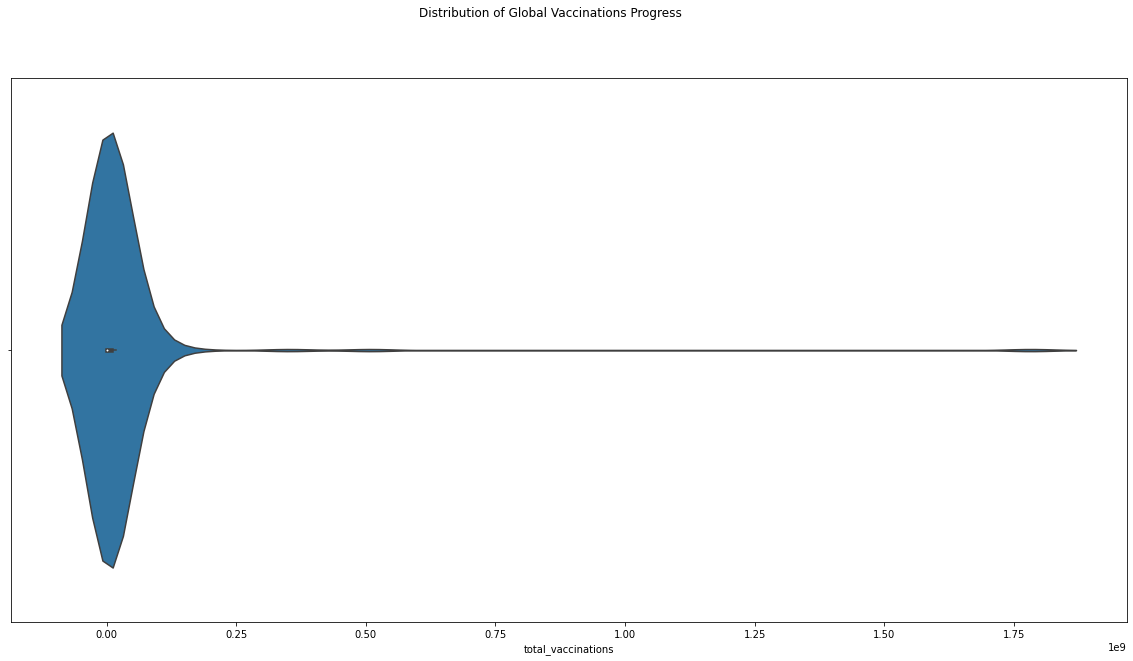

In [ ]:
plt.figure(figsize=(20,10))
plt.suptitle("Distribution of Global Vaccinations Progress")
sns.violinplot(data = total,
            x = 'total_vaccinations',
              showmedians=True,
              showmeans=True)
plt.show()

This violin releases that there is an uneven distribution and the difference of vaccinations progress among countries are huge. 

**3.3. What is the global average vaccinations by month ?**

Now let's check the progress of vaccinations through months to see wheter the progress is increasing or not. Here, I calculated the mean of the global daily vaccinations under the reference of month to have the overview.

In [ ]:
# Find the global average total vaccinations by month
df['date'] = pd.to_datetime(df['date'])
avg = df.groupby(df['date'].dt.strftime('%B'))['daily_vaccinations'].mean().sort_values().reset_index()
avg


,date,daily_vaccinations
0,December,24175
1,January,45164
2,February,55467
3,March,67836
4,April,92488
5,May,125624
6,July,173540
7,June,180067
8,August,317931


If you look closely, you will see that July came before June. Therefore, I would reindex these two months.

In [ ]:
avg = avg.reindex([0, 1, 2, 3, 4, 5, 7, 6, 8])
avg

,date,daily_vaccinations
0,December,24175
1,January,45164
2,February,55467
3,March,67836
4,April,92488
5,May,125624
7,June,180067
6,July,173540
8,August,317931


Good!

In [ ]:
# Lineplot to see the full progress
fig = px.line(avg, 
             x='date', 
             y='daily_vaccinations',
             labels = {'daily_vaccinations' : 'Global Monthly Vaccinations', 'date' : 'Month'},
             title = "Average Total Vaccinations"
            )
fig.show()

It is obviously that the world is doing good when the line is gradually increasing except that there is a slight drop between June and July, it may be because the appearance Delta mutation at that time so it decelerated the progress. Note that from July to August, there is a sudden climb. It can be explained that there is not enough data for August in the dataset. Therefore,the value of August is not objective.

So far, it is quite enough to have a basic view of the current status. Now, let's take a quick look at the popularity of the present vaccines.

**3.4. What vaccine is most common used and least common used ?**

Let's explore the popularity of vaccines by summing their total up. In this case, like the total_vaccinations column in the country_vaccinations dataset, the value in the total_vaccinations in country_vaccinations_by_manufacturers are cummulative. Therefore, I used max function to take out the lastest value of each vaccine.

In [ ]:
# Call out the number of total vaccines used by country and vaccine types
vpc = vbm.groupby(['vaccine', 'location'])['total_vaccinations'].max().reset_index()
vpc


,vaccine,location,total_vaccinations
0,CanSino,Chile,506741
1,Johnson&Johnson,Austria,211849
2,Johnson&Johnson,Belgium,319928
3,Johnson&Johnson,Bulgaria,88846
4,Johnson&Johnson,Croatia,52562
...,...,...,...
123,Sinovac,Chile,18526768
124,Sinovac,Hong Kong,2412097
125,Sinovac,Uruguay,3234526
126,Sputnik V,Hungary,1813006


In [ ]:
# Rank the popularity of vaccines
vr = vpc.groupby('vaccine')['total_vaccinations'].sum().reset_index()
vr = vr.sort_values('total_vaccinations', ascending=False)
vr

,vaccine,total_vaccinations
4,Pfizer/BioNTech,642060353
2,Moderna,197973681
3,Oxford/AstraZeneca,65691859
1,Johnson&Johnson,25556141
6,Sinovac,24173391
5,Sinopharm/Beijing,2096148
7,Sputnik V,1848310
0,CanSino,506741


In [ ]:
# Pieplot
fig = px.pie(vr, values='total_vaccinations', names='vaccine', title='Vaccines Occupancy' )
fig.show()

This pie chart illustrates the real domination of Pfizer/BioNTech. What a vaccine!

In [ ]:
# Barplot
fig = px.bar(vr, 
             y='total_vaccinations', 
             x='vaccine',
             labels = {'vaccine' : 'Vaccines', 'total_vaccinations' : 'Total Vaccinations'},
             title = "Overview of Vaccines"
            )
fig.show()

There are only 33 countries mentioned in the dataset. However, it is enough to figure out that Pfizer/BioNTech and Moderna are the leaders in this race. While, the two vaccines made by Chinese (CanSino, Sinopharm/Beijing) look unpopular. 

Since one country may uses several types of vaccines. I decided to make a table to look at the total number of vaccines they have used so far.

In [ ]:
# Creat pivot table
pvt = pd.pivot_table(data = vbm, index = ['location'], columns = ['vaccine'], values = 'total_vaccinations', aggfunc = 'max')
pvt.fillna(0) # Fill null values by 0 to have a better view of the table

vaccine,CanSino,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinovac,Sputnik V
location,,,,,,,,
Austria,0,211849,975804,1572363,6948170,0,0,0
Belgium,0,319928,1251731,2673762,10145990,0,0,0
Bulgaria,0,88846,258066,476371,1212406,0,0,0
Chile,506741,0,0,412797,6242527,0,18526768,0
Croatia,0,52562,301710,539025,2185003,0,0,0
Cyprus,0,18089,77849,251076,648196,0,0,0
Czechia,0,156396,863774,864916,8787293,0,0,0
Denmark,0,47734,799218,154453,6142986,0,0,0
Estonia,0,38191,106685,236109,769293,0,0,0


It can be seen that Pfizer/BioNTech is used by all of the listed countries and its biggest consumer is undoubtedly, their origin country, the Uninted States with more than 193.5 millions doses used. While CanSino and Sinopharm/Beijing are only used by one country, Chile and Hungary respectively.

**3.5. What are the top 5 countries that are having the highest rate and the lowest rate of fully vaccinated people per population ?**


To do this, we need to calculate the rate between fully vaccinated people per population first. As I have cleaned the data at the beginning of the notebook. We now just need to divide two columns.

In [ ]:
# Find rate
pd.reset_option('display.float_format') # Re-format to get float values
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Set number of figure after doc
cbn['percentage'] = ((cbn['people_fully_vaccinated'])/(cbn['2021_last_updated']))*100 # Set percentage value under % type
cbn

,index,country,2021_last_updated,country_vaccinations,people_fully_vaccinated,percentage
0,1,Albania,2872370.00,Albania,545036.00,18.98
1,2,Algeria,44694125.00,Algeria,724812.00,1.62
2,3,Andorra,77355.00,Andorra,33904.00,43.83
3,4,Angola,34043709.00,Angola,710113.00,2.09
4,5,Anguilla,15117.00,Anguilla,8765.00,57.98
...,...,...,...,...,...,...
170,183,Venezuela,28728962.00,Venezuela,1100000.00,3.83
171,184,Vietnam,98253611.00,Vietnam,888459.00,0.90
172,185,Yemen,30558838.00,Yemen,13322.00,0.04
173,186,Zambia,18975907.00,Zambia,188219.00,0.99


The reason why I used reset_option is that when we divide two column, the values tend to be float. However, the default format may be int so we cannot get our values. So remember when you do something similar, make sure that the format is float.

It is totally good now. Let's analyze!

**3.5.1. Top 5 countries with highest vaccinations rate per population:**

In [ ]:
tfh = cbn.sort_values('percentage', ascending=False).head(5)
tfh

,index,country,2021_last_updated,country_vaccinations,people_fully_vaccinated,percentage
99,105,Malta,442934.00,Malta,395537.00,89.30
72,76,Iceland,343578.00,Iceland,255322.00,74.31
31,32,Cayman Islands,66497.00,Cayman Islands,48111.00,72.35
164,177,United Arab Emirates,10001593.00,United Arab Emirates,7130830.00,71.30
141,149,Seychelles,98946.00,Seychelles,68553.00,69.28


**3.5.2. Top 5 countries with lowest vaccinations rate per population:**

In [ ]:
cbn.sort_values('percentage').head(5)

,index,country,2021_last_updated,country_vaccinations,people_fully_vaccinated,percentage
68,72,Haiti,11555977.00,Haiti,341.00,0.00
26,27,Burkina Faso,21558166.00,Burkina Faso,2371.00,0.01
169,182,Vanuatu,315214.00,Vanuatu,114.00,0.04
148,158,South Sudan,11400885.00,South Sudan,4763.00,0.04
172,185,Yemen,30558838.00,Yemen,13322.00,0.04


From these two tables, we can see that countries with low population tends to have high rate of vaccinations while countries with high population is oppostite. To test the hypothesis, I used scatterplot to plot the relationship between the two index to see wheter they are correlated or not.

In [ ]:
# Scatterplot
fig = px.scatter(cbn, 
                y="2021_last_updated", 
                x="percentage",
                labels = {'2021_last_updated' : 'Population', 'percentage' : 'Percentage'},
                title = "Scatterplot"
               )
fig.show()

Here is the scatterplot we are looking for. But, it looks like there is something unclear. Since we are having the outliers, the range is too wide. Therefore, I dropped the outliers to have a clearer view.

In [ ]:
# Find quantile range and select normal values
pd.set_option('display.float_format', lambda x: '%.0f'% x)
cbn = cbn.sort_values('2021_last_updated', ascending=False)
qt1 = cbn['2021_last_updated'].quantile(0.25) # Quantile 1
qt3 = cbn['2021_last_updated'].quantile(0.75) # Quantile 3
IQR_cbn = qt3 - qt1 # Quantile range
Upper_cbn = qt3 + 1.5*IQR_cbn # Upper whisker
Lower_cbn = qt1 - 1.5*IQR_cbn # Lower whisker 
cbn_sort = cbn[(Lower_cbn < cbn['2021_last_updated']) & (cbn['2021_last_updated'] < Upper_cbn)].reset_index()

In [ ]:
# Scatter plot for normal values
fig = px.scatter(cbn_sort, 
                y="2021_last_updated", 
                x="percentage",
                labels = {'2021_last_updated' : 'Population', 'percentage' : 'Percentage'},
                title = "Scatterplot excluding outliers"
               )
fig.show()

Now it is much clearer. This scatterplot is null which means there is no relationship between population and the rate of vaccinations and we can reject the hypothesis.

**If you are reading this setence, I guess you are having a clearer view of how vaccinations analysis is made. Thank you for spending your time with me!**